# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [242]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/call-center-cleanup-assignment/NorthCallCenter.csv')
south_df = pd.read_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/call-center-cleanup-assignment/SouthCallCenter.csv')



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [243]:
#Code Used:


north_df['Rep ID'].describe()
n1= len(pd.unique(north_df['Rep ID']))
print("reps in the North branch" ,n1)

reps in the North branch 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [244]:
#Code Used:
n2 = len(pd.unique(south_df['Rep ID']))
print("reps in the South branch",n2)

reps in the South branch 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 9.987755	1.914286	3.048780	2.967347

In [245]:
#Code Used:
north_df.describe()
print(north_df[('Busy Minutes')].mean(), north_df[('Not Ready Minutes')].mean(),
      north_df[('Incoming Wait Time')].mean(), north_df[('During Call Wait Time')].mean())



9.987755102040817 1.9142857142857144 3.048780487804878 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 10.05414	1.910828	3.000000	3.076433

In [246]:
#Code Used:
south_df.describe()

print(south_df[('Busy Minutes')].mean(), south_df[('Not Ready Minutes')].mean(),
      south_df[('Incoming Wait Time')].mean(), south_df[('During Call Wait Time')].mean())

10.054140127388536 1.910828025477707 3.0 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?
9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43


In [247]:
# Code Used:
frames = [north_df, south_df]
  
df = pd.concat(frames)


df2 = df.pivot_table(index = ['Time Block'], aggfunc ='size')
print(df2)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.987755			
> - Not Ready Minutes = 1.914286
> - Incoming Wait Time = 3.048780
> - During Call Wait Time = 2.967347
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05414				
> - Not Ready Minutes = 1.910828
> - Incoming Wait Time = 3.000000
> - During Call Wait Time = 3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in the Incoming Wait Time column, These are NaN because they belong to outgoing calls, I would convert the values from NaN to 0 so that all the data is numeric to perform analysis 

In [248]:
# Code Used
#df.isnull( ).sum( )#351

# Add Additional Cells as needed.




df = df.fillna(0)
south_df = south_df.fillna(0)
north_df = north_df.fillna(0)
df.isnull().sum()





Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: To maintain consistancy in the data, I replaced the "YES " value containing space with "YES" using str.strip() function


In [249]:
#Code Used

north_df['Sale']
values = pd.unique(north_df['Sale'])
print("sale values in the North branch" ,values)

# Add Additional Cells as needed.
north_df['Sale'] = north_df['Sale'].str.strip()
values1 = pd.unique(north_df['Sale'])
print("latest sale values in the North branch" ,values1)


sale values in the North branch ['NO' 'YES ' 'YES']
latest sale values in the North branch ['NO' 'YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes there are duplicates in the two data sets. I dropped the duplicates.

In [250]:
#Code Used
duplicates1 = north_df.duplicated()
duplicates2 = south_df.duplicated()
duplicates3 = df.duplicated()
duplicates1.sum()
duplicates2.sum()
duplicates3.sum()

# Add Additional Cells as needed.

#dropping duplicate values 
df = df.drop_duplicates()
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()
duplicates1 = north_df.duplicated()
duplicates1.sum()
duplicates2 = south_df.duplicated()
duplicates2.sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Yes, the column named 'Unnamed: 0' in both the datasets is not necessary so I dropped it.

In [251]:
#Code Used
df.head()
north_df.head()
south_df.columns
# Add Additional Cells as needed.
df = df.drop(columns='Unnamed: 0')
north_df = north_df.drop(columns='Unnamed: 0')
south_df = south_df.drop(columns='Unnamed: 0')

print(south_df.columns)
print(north_df.columns)
print(df.columns)

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [252]:
# Create dataframe for the entire company named df

frames = [north_df, south_df]
  
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     559 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 65.5+ KB


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent--> 37
- South Branch = Eric --> 35


In [253]:
# Code Used
gb1 = df.groupby("Rep ID")
gb1.first()
north_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)
south_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)

# Add Additional Cells as needed.

/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_1756/191660096.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)
/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_1756/191660096.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
George,0,0,298,53,41.0,87,29
Kate,0,0,291,61,37.0,83,29
Karl,1,0,287,61,26.0,85,28
Josh,3,0,260,50,31.0,83,26
Susan,2,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.857%
- South Branch = 1.273%
- Company Wide = 1.967%
- Do any of these fall out of the optimal range of 2-5%? -->south branch has average call abandoned rate as 1.27% it is doing better than optimal range

In [254]:
# Code Used
print(df.head())

ac = (df['Abandoned'] == 1).sum()
tc = (df['Calls'] == 1).sum()
print(ac)
print(tc)
print("%calls abandoned in company", (ac/tc)*100)


acn =(north_df['Abandoned'] == 1).sum()
tcn = (north_df['Calls'] == 1).sum()
print(acn)
print(tcn)
print("%calls abandoned in north branch", (acn/tcn)*100)

acs =(south_df['Abandoned'] == 1).sum()
tcs = (south_df['Calls'] == 1).sum()
print(acs)
print(tcs)
print("%calls abandoned in south brnach", (acs/tcs)*100)




# Add Additional Cells as needed.

  Branch     Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
0  North        Complaint    9:00 AM             Incoming     B  Brent   NO   
1  North    Sales Support   11:00 AM             Incoming     A    Cam   NO   
2  North    Sales Support   11:00 AM             Incoming     B   Todd   NO   
3  North    Sales Support    4:00 PM             Incoming     B  Brent   NO   
4  North  Product Support   12:00 PM             Incoming     B  Brent   NO   

   Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
0          0          1             9                  2                 1.0   
1          0          0            11                  1                 1.0   
2          0          0             9                  3                 1.0   
3          0          0            11                  2                 1.0   
4          0          0             8                  2                 1.0   

   During Call Wait Time  Calls  
0         

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 , 40.24%
- South Branch = 48 , 38.09%
- Company Wide = 81 , 38.94%

In [255]:
# Code Used



# Get count of values less than 2 in the column 
count1 = north_df['Incoming or Outgoing'][(north_df['Incoming Wait Time'] > 0) & (north_df['Incoming Wait Time'] <= 2)].count()         
#total incoming calls    
counttotal1 = north_df['Incoming or Outgoing'][north_df['Incoming or Outgoing'] == 'Incoming'].count()
#percentage
p1 =(count1/counttotal1)*100
print(count1)
print(counttotal1)
print("percentage of calls answered within 2 seconds in north branch is",p1 )


# Get count of values less than 2 in the column 
count2 = south_df['Incoming Wait Time'][(south_df['Incoming Wait Time'] > 0)& (south_df['Incoming Wait Time'] <= 2)].count()
          
#total incoming calls    
counttotal2 = south_df['Incoming or Outgoing'][south_df['Incoming or Outgoing'] == 'Incoming'].count()
counttotal2
#percentage
p2 =(count2/counttotal2)*100
print(count2)
print(counttotal2)
print("percentage of calls answered within 2 seconds in south branch is",p2)

# Get count of values greater than 2 in the column 
count3 = df['Incoming Wait Time'][(df['Incoming Wait Time'] > 0)&(df['Incoming Wait Time'] <= 2)].count()
            
#total incoming calls    
counttotal3 = df['Incoming or Outgoing'][df['Incoming or Outgoing'] == 'Incoming'].count()
#percentage
p3 =(count3/counttotal3)*100
print(count3)
print(counttotal3)
print("percentage of calls answered within 2 seconds company wide",p3)

#south_df[south_df['Incoming Wait Time'] <= 2.0].count()
#south_df[south_df['Incoming or Outgoing'] == 'Incoming'].count()





33
82
percentage of calls answered within 2 seconds in north branch is 40.243902439024396
48
126
percentage of calls answered within 2 seconds in south branch is 38.095238095238095
81
208
percentage of calls answered within 2 seconds company wide 38.94230769230769


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.0487 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.0192 seconds


In [256]:
#code

# Filter the incoming calls for company
Incomingcallsdf = df[df['Incoming or Outgoing'] == 'Incoming']

# Calculate the average speed of answer for company
asadf = Incomingcallsdf['Incoming Wait Time'].mean()



# Filter the incoming calls for north branch
Incomingcallsndf = north_df[north_df['Incoming or Outgoing'] == 'Incoming']

# Calculate the average speed of answer north branch
asandf = Incomingcallsndf['Incoming Wait Time'].mean()



# Filter the incoming calls for south branch
Incomingcallssdf = south_df[south_df['Incoming or Outgoing'] == 'Incoming']

# Calculate the average speed of answer for south branch 
asasdf = Incomingcallssdf['Incoming Wait Time'].mean()

print(asadf, asandf, asasdf)



3.019230769230769 3.048780487804878 3.0


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here: 'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544

> Chart style you chose and why: Bar chart, because is used to display and compare categorical data. It consists of rectangular bars where the length of each bar is proportional to the value it represents. In this case we have 4 categories and their corresponding values so I used Bar chart

/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_1756/600391544.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


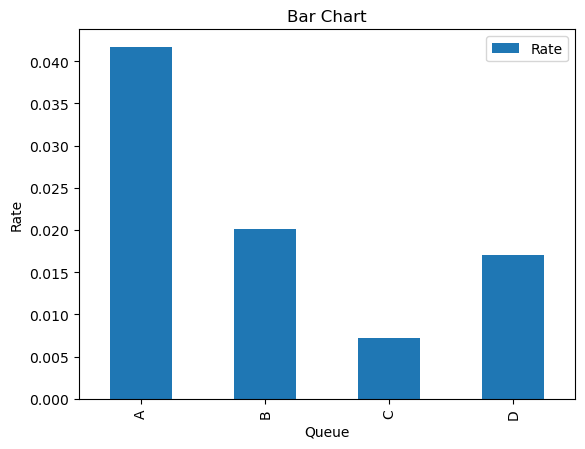

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


In [257]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
rate = [0,0,0,0]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    rate[i] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    
#Your Code Here:

data = {'Queue': queues,
        'Rate': rate}
df1 = pd.DataFrame(data)

# Generate the bar chart
df1.plot(kind='bar', x='Queue', y='Rate')

# Customize the plot
plt.xlabel('Queue')
plt.ylabel('Rate')
plt.title('Bar Chart')
plt.show()

print(abandonment_rates)


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:    
   Amanda             23.809524            0.521739
1    Andy             62.500000            1.565217
2   Brent             22.857143            0.459459
3     Cam             61.111111            1.333333
4    Duke             66.666667            1.344828
5     Joe             55.555556            1.384615
6   Lilly             54.545455            1.233333
7    Todd             24.000000            0.724138
8  Xander             30.000000            0.833333

> Chart style you chose and why: grouped bar chart because A grouped bar chart is used when you want to compare the values of multiple categories within each main category. In this case we have 9 representatives and 2 values for each representative so I though I can go with bar chart.

   Rep ID  Calls_x  Calls_y  Service Level %  Incoming Wait Time
0  Amanda       21        5        23.809524            0.521739
1    Andy       16       10        62.500000            1.565217
2   Brent       35        8        22.857143            0.459459
3     Cam       18       11        61.111111            1.333333
4    Duke       21       14        66.666667            1.344828
5     Joe       18       10        55.555556            1.384615
6   Lilly       22       12        54.545455            1.233333
7    Todd       25        6        24.000000            0.724138
8  Xander       20        6        30.000000            0.833333


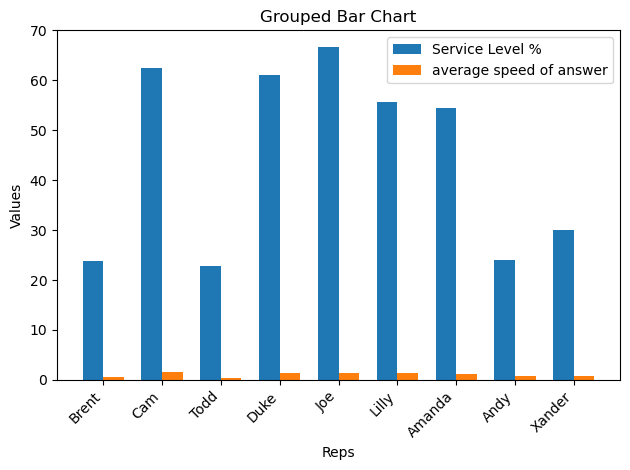

In [258]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_y"]/service_level["Calls_x"] * 100

data = pd.merge(service_level, north_plt, on="Rep ID")
#Your Code Here:

print(data)

vdf = pd.DataFrame(data)



Reps = ['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander']
labels = ['Service Level %', 'average speed of answer']

values_servicelevel = [23.809524, 62.500000, 22.857143, 61.111111, 66.666667,55.555556,54.545455,24.000000,30.000000 ]
values_speedofanswer = [0.52, 1.56, 0.46,1.33,1.34,1.38,1.23,0.72, 0.83]


# Set the positions for the bars
x = np.arange(len(Reps))

# Define the width of the bars
width = 0.35

# Create the grouped bar chart
plt.bar(x - width/2, values_servicelevel, width, label='Service Level %')
plt.bar(x + width/2, values_speedofanswer, width, label='average speed of answer')

# Adding labels and title
plt.xlabel('Reps')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(x, Reps, rotation=45, ha='right')  # Rotate category labels for better visibility
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here: 
Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75

> Chart style you chose and why: Mosaic plot because it shows possible relationships between categorical variables. Here we have incoming and outgoing call categories for 3 different call purposes so Mosaic plot can be used here

In [259]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
print(complaints)
print(sales_support)
print(product_support)




categories = ['Incoming', 'Outgoing']
callpurpose = ["Complaint", "Product Support", "Sales Support"]






Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Using KPIs such as average abandonment rate, service level and average speed of answer, In openion south branch is doing slightly better than north branch. Because all three mentioned KPIs are inclined towards better efficiency of South branch. 

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Both the Branches are doing almost at the same speed except for slight difference. North branch has the representative taking highest number of calls. but still considering the KPI's and number of representatives in each I feel North branch would benifit from extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I find the data appropriate to perform analysis, I don't think there is any extra information needed


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [260]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: